In [12]:
from create_vars.vars import *

In [13]:
import pandas as pd
import numpy as np
import random


Criando variáveis numéricas e categóricas 

## Install

```sh
pip install create_vars
```

## How to use

### Criando dataframe aleatório

Criando DataFrame com variáveis categóricas e numéricas

In [14]:
# Criando o DataFrame
data = {
    'ID_cliente': [random.choice(list(range(1, 101)))for _ in range(100)],
    'Safra': [random.choice([202207, 202209, 202212, 202301, 202207, 202302, 202305, 202306]) for _ in range(100)],
    'Feat_cat': [random.choice(['A', 'B', 'C']) for _ in range(100)],    
    'Feat_num1': np.random.randint(0, 100, size=100),
    'Feat_num2': np.random.randint(0, 100, size=100)
}
df = pd.DataFrame(data)

In [15]:
df.head()

,ID_cliente,Safra,Feat_cat,Feat_num1,Feat_num2
0,6,202207,A,54,12
1,96,202302,B,39,52
2,44,202301,A,68,98
3,40,202306,C,75,78
4,80,202207,A,95,90


O Dataframe criado tem o ID do cliente aleatório, que pode se repetir em datas diferentes.Por exemplo:

In [16]:
df.groupby('ID_cliente')['Safra'].value_counts().sort_values(ascending=False)

ID_cliente  Safra 
85          202207    3
19          202207    2
2           202207    2
53          202207    2
71          202207    2
                     ..
38          202301    1
            202302    1
36          202207    1
35          202306    1
99          202301    1
Name: count, Length: 92, dtype: int64

A safra corresponde a data que cada variável foi calculada. Ela precisa estar no formato YYYYMM ou YYYYMMDD. Para o nosso exemplo teremos a seguinte distribuição das datas:

<Axes: xlabel='Safra'>

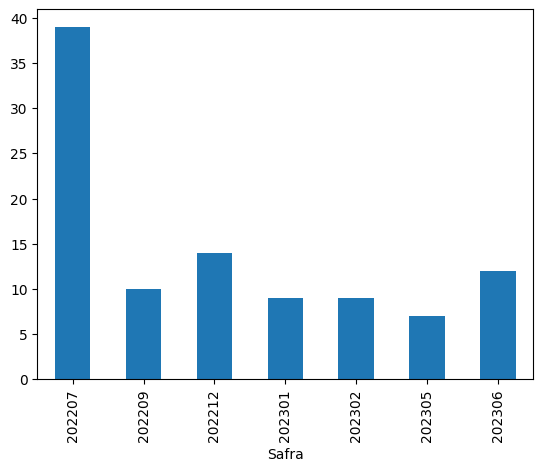

In [17]:
df['Safra'].value_counts().sort_index().plot.bar()

### Safra de ref

Criando safra de referencia no formato YYYYMM: 

In [18]:
df['safra_ref'] = '20230702'

Também podemos utilizar o formato YYYYMMDD.

### Variáveis numéricas

A partir do ID_cliente do cliente e da Safra, agrupamos as entradas e calculamos variáveis do tipo 'sum', 'mean' e 'count' que são fornecidas em forma de lista em 'operations' para variáveis numéricas. As variáveis utilizadas são listadas em 'value_var' e calculadas nas janelas de tempo em 'window' para a data de referência em 'ref_time_var'.

In [19]:
id_cols = ['ID_cliente','Safra']
trns_time = 'Safra'
ref_time = 'safra_ref'
value_var = ['Feat_num1','Feat_num2']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['sum','mean','count']

df_vars_num = create_vars_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [20]:
df_vars_num.head()

,ID_cliente,Safra,Feat_num1_sum_1M,Feat_num1_mean_1M,Feat_num1_count_1M,Feat_num1_sum_2M,Feat_num1_mean_2M,Feat_num1_count_2M,Feat_num1_sum_3M,Feat_num1_mean_3M,...,Feat_num2_count_6M,Feat_num2_sum_9M,Feat_num2_mean_9M,Feat_num2_count_9M,Feat_num2_sum_12M,Feat_num2_mean_12M,Feat_num2_count_12M,Feat_num2_sum_15M,Feat_num2_mean_15M,Feat_num2_count_15M
0,6,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12.0,1
1,96,202302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,52.0,52.0,1.0,52.0,52.0,1.0,52,52.0,1
2,44,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,98.0,98.0,1.0,98.0,98.0,1.0,98,98.0,1
3,40,202306,NaN,NaN,NaN,75.0,75.0,1.0,75.0,75.0,...,1.0,78.0,78.0,1.0,78.0,78.0,1.0,78,78.0,1
4,80,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,90.0,1


### Variáveis categóricas

Para variáveis categóricas, as operações são 'nunique' e mode.


In [21]:
id_cols = ['ID_cliente','Safra']
trns_time = 'Safra'
ref_time = 'safra_ref'
value_var = ['Feat_cat']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['nunique', mode]

df_vars_cat = create_vars_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [22]:
df_vars_cat.head()

,ID_cliente,Safra,Feat_cat_nunique_1M,Feat_cat_mode_1M,Feat_cat_nunique_2M,Feat_cat_mode_2M,Feat_cat_nunique_3M,Feat_cat_mode_3M,Feat_cat_nunique_6M,Feat_cat_mode_6M,Feat_cat_nunique_9M,Feat_cat_mode_9M,Feat_cat_nunique_12M,Feat_cat_mode_12M,Feat_cat_nunique_15M,Feat_cat_mode_15M
0,6,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
1,96,202302,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,1.0,B,1.0,B,1,B
2,44,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,A,1.0,A,1,A
3,40,202306,NaN,NaN,1.0,C,1.0,C,1.0,C,1.0,C,1.0,C,1,C
4,80,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
